# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

**Вариант 2: задания 1 и 2 на наборе данных MNIST**

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



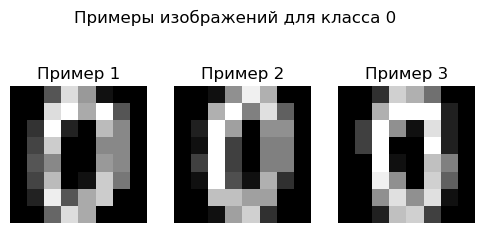

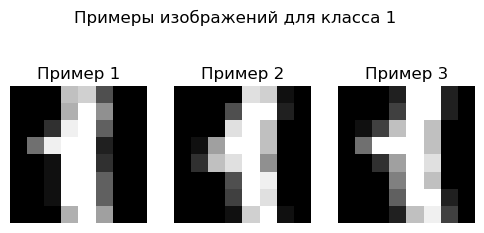

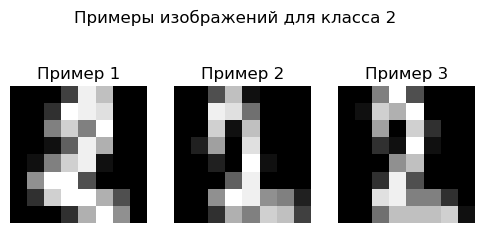

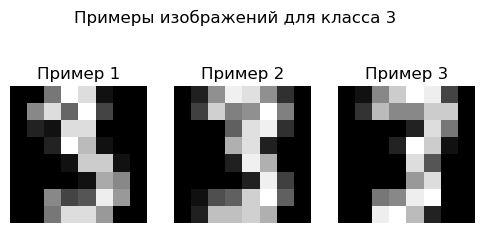

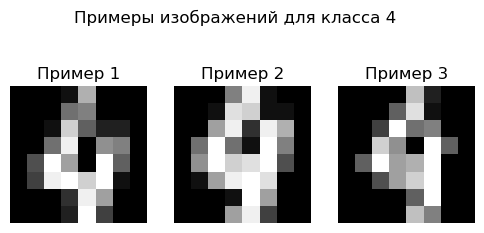

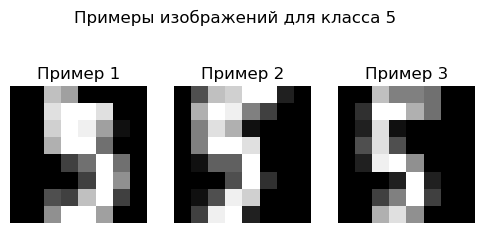

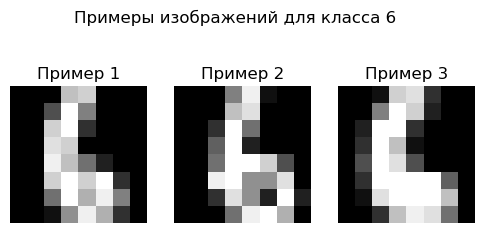

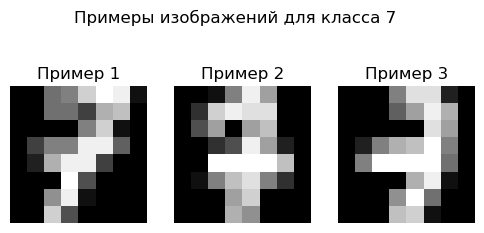

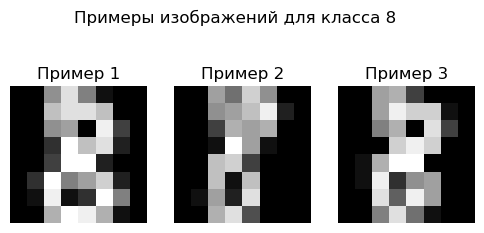

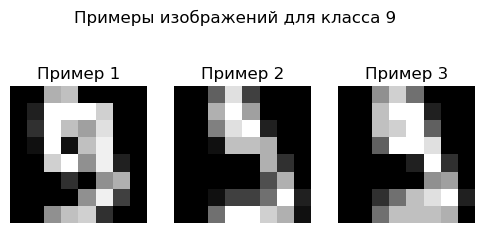

In [3]:
# Создаем словарь для хранения индексов изображений для каждого класса
class_indices = {}
for i in range(10):
    class_indices[i] = []

# Заполняем словарь индексами изображений для каждого класса
for idx, label in enumerate(y):
    class_indices[label].append(idx)

# Выводим несколько примеров изображений для каждого класса
num_examples = 3
for label in range(10):
    plt.figure(figsize=(6, 3))
    plt.suptitle(f"Примеры изображений для класса {label}")
    for i, idx in enumerate(class_indices[label][:num_examples]):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(X[idx].reshape(8, 8), cmap='gray')
        plt.axis('off')
        plt.title(f"Пример {i + 1}")
    plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (1437, 64)
Training labels shape:  (1437,)
Test data shape:  (360, 64)
Test labels shape:  (360,)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [8]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [9]:
# num_loops
# 0: compute_distances_no_loops
# 1: compute_distances_one_loop
# 2: compute_distances_two_loops

y_pred = classifier.predict(X_test, k=3, num_loops=0)
# print(y_pred)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


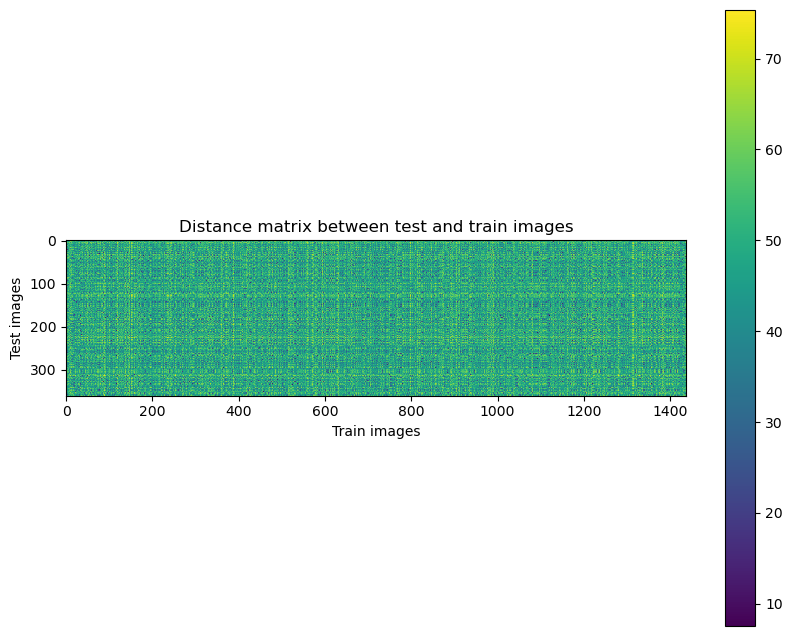

In [10]:
# Рассчитываем матрицу расстояний
squared_dists = np.sum(X_test**2, axis=1)[:, np.newaxis] + np.sum(classifier.X_train**2, axis=1) - 2 * np.dot(X_test, classifier.X_train.T)
dists = np.sqrt(squared_dists)

# Визуализируем матрицу расстояний
plt.imshow(dists, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xlabel('Train images')
plt.ylabel('Test images')
plt.title('Distance matrix between test and train images')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [11]:
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

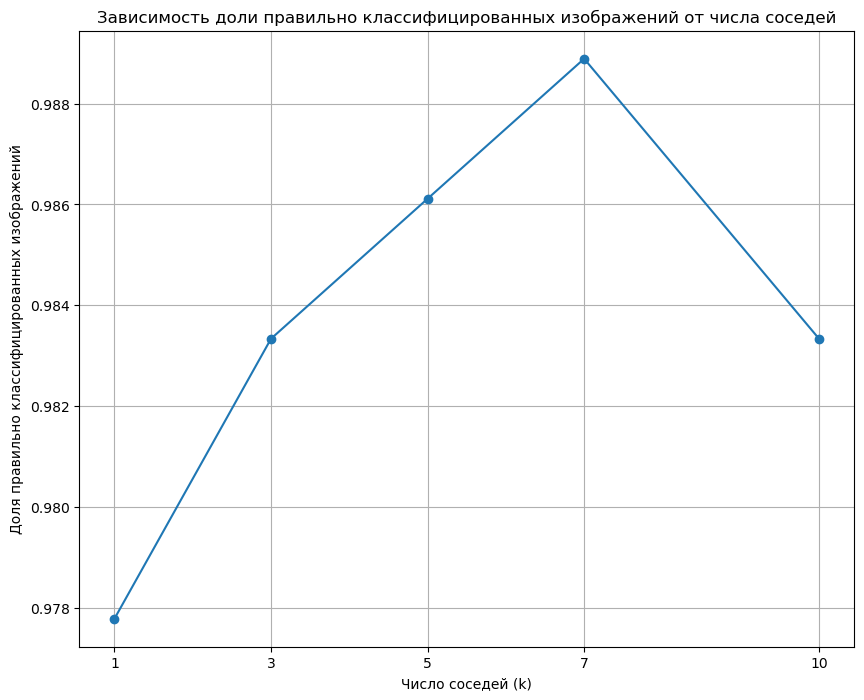

In [12]:
# Задаем список числа соседей для рассмотрения
k_values = [1, 3, 5, 7, 10]

# Создаем списки для хранения доли правильно классифицированных изображений
accuracies = []

for k in k_values:
    # Предсказываем метки классов для тестовых данных с использованием разного числа соседей
    y_pred = classifier.predict(X_test, k=k, num_loops=0)
    
    # Вычисляем точность классификации
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

# Строим график зависимости доли правильно классифицированных изображений от числа соседей
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.title('Зависимость доли правильно классифицированных изображений от числа соседей')
plt.xlabel('Число соседей (k)')
plt.ylabel('Доля правильно классифицированных изображений')
plt.xticks(k_values)
plt.grid(True)
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [13]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
accuracies = [] #точность для каждого значения параметра k

for k in k_values:
    correct = 0 #кол-во правильных предсказаний
    for train_index, test_index in loo.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
        
        classifier.train(X_train_fold, y_train_fold)
        y_pred = classifier.predict(X_val_fold, k=k)
        
        if y_pred == y_val_fold:
            correct += 1
    
    accuracy = correct / len(X_train) #кол-во правильных предсказаний/общее кол-во обучающих данных
    accuracies.append(accuracy)

best_k = k_values[np.argmax(accuracies)]
print(f'Best k value based on LOOCV: {best_k}')

Best k value based on LOOCV: 1



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [14]:
y_pred = classifier.predict(X_test, k=1, num_loops=0)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


1.11 Сделайте выводы по результатам 1 части задания.

Принцип работы метода kNN основан на том, что объекты, близкие в пространстве признаков, склонны принадлежать к одному и тому же классу или иметь похожие значения целевой переменной, важным параметром метода kNN является количество соседей k, которое необходимо выбирать оптимальным образом для достижения наилучшей производительности алгоритма.

Выполнение задания позволило оценить работу классификатора kNN на наборе данных MNIST, определить оптимальное значение параметра k и проверить его эффективность на тестовой выборке

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 60% обучающая, 20% валидационная, 20% тестовая


# Преобразование каждого изображения в одномерный массив
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# Вывод размеров выборок
print("Обучающая выборка:", X_train.shape, y_train.shape)
print("Валидационная выборка:", X_val.shape, y_val.shape)
print("Тестовая выборка:", X_test.shape, y_test.shape)

Обучающая выборка: (1077, 64) (1077,)
Валидационная выборка: (360, 64) (360,)
Тестовая выборка: (360, 64) (360,)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

[0.00000000e+00 2.99907149e-01 5.14948932e+00 1.17966574e+01
 1.19359331e+01 5.89972145e+00 1.39832869e+00 1.42989786e-01
 6.49953575e-03 1.93129062e+00]


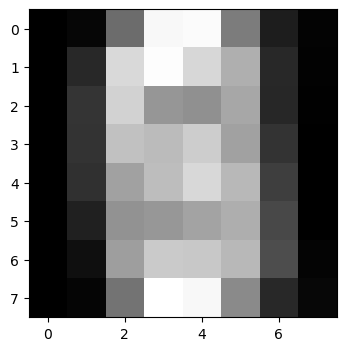

(1077, 65) (360, 65) (360, 65)


In [16]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4, 4))
plt.imshow(mean_image.reshape((8, 8)), cmap='gray')  # Изменение формы на (8, 8) и использование цветовой карты 'gray'
plt.show()



X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

# Добавление дополнительной размерности к массиву данных и заполнение ее 1
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [17]:
from scripts.classifiers.linear_svm import svm_loss_naive
import time

W = np.random.randn(65, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_train, y_train, 0.000005)
print('loss: %f' % (loss, ))

loss: 8.986197



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [18]:

loss, grad = svm_loss_naive(W, X_train, y_train, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_train, y_train, 5e1)
f = lambda w: svm_loss_naive(w, X_train, y_train, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

/Users/kate/Desktop/8 семестр/Нейронные_сети/DL_Course_SamU-master/lab_1-2/scripts/gradient_check.py:126: RuntimeWarning: invalid value encountered in scalar divide
  rel_error = (abs(grad_numerical - grad_analytic) /


numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: -0.014708 analytic: -0.014708, relative error: 6.448354e-09
numerical: 0.652592 analytic: 0.652592, relative error: 2.459801e-10
numerical: 0.515988 analytic: 0.515988, relative error: 7.802614e-10
numerical: -1.515446 analytic: -1.515446, relative error: 5.415141e-10
numerical: -0.554241 analytic: -0.554241, relative error: 3.945499e-10
numerical: -5.593222 analytic: -5.593222, relative error: 6.484208e-11
numerical: 1.545577 analytic: 1.545577, relative error: 1.384314e-10
numerical: 0.000888 analytic: 0.000888, relative error: 4.313944e-07
numerical: 0.078651 analytic: 0.078651, relative error: 5.356162e-09
numerical: 0.193047 analytic: 0.193047, relative error: 1.356162e-09
numerical: -0.914644 analytic: -0.914644, relative error: 4.141594e-10
numerical: -4.028871 analytic: -4.028871, relative error: 5.624517e-11
numerical: -3.466940 analytic: -3.466940, relative error: 2.933755e-11
numerical: 0.300727 analytic:

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [19]:
from scripts.classifiers.linear_svm import svm_loss_vectorized

tic = time.time()
_, grad_naive = svm_loss_naive(W, X_train, y_train, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_train, y_train, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.033880s
Vectorized loss and gradient: computed in 0.000938s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [20]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 26.331913
iteration 100 / 1500: loss 15.315515
iteration 200 / 1500: loss 11.284457
iteration 300 / 1500: loss 9.807621
iteration 400 / 1500: loss 9.257812
iteration 500 / 1500: loss 9.064091
iteration 600 / 1500: loss 8.994744
iteration 700 / 1500: loss 8.966296
iteration 800 / 1500: loss 8.957735
iteration 900 / 1500: loss 8.953850
iteration 1000 / 1500: loss 8.951403
iteration 1100 / 1500: loss 8.951528
iteration 1200 / 1500: loss 8.949967
iteration 1300 / 1500: loss 8.953061
iteration 1400 / 1500: loss 8.952417
That took 0.138031s


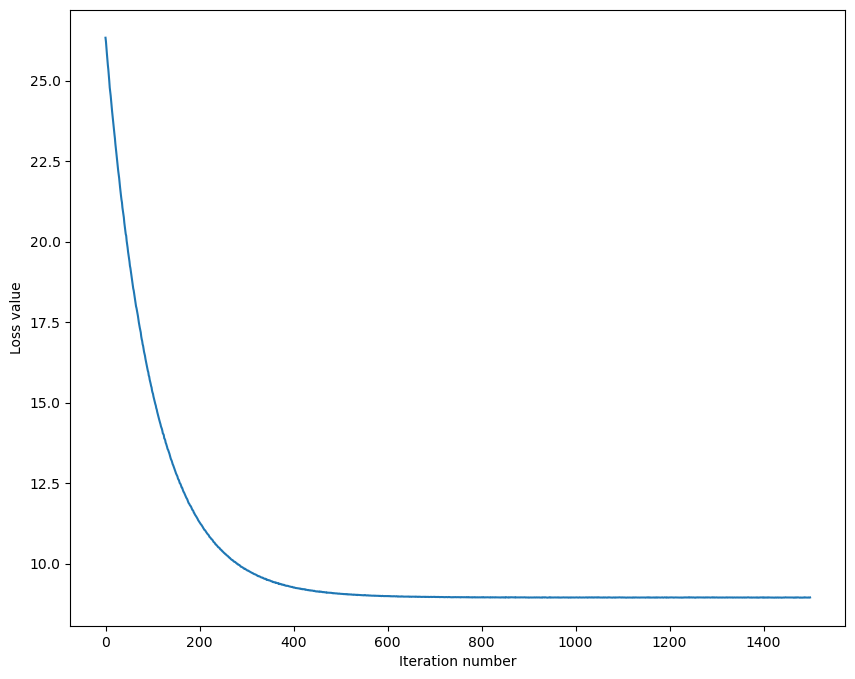

In [21]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [22]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.863510
validation accuracy: 0.869444


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [29]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

results = {} #результаты точности модели
best_val = -1 
best_svm = None

#все возможные комбинации
grid_search = [ (lr,rg) for lr in learning_rates for rg in regularization_strengths ]

for lr, rg in grid_search:
    svm = LinearSVM()
    
    train_loss = svm.train(X_train, y_train, learning_rate=lr, reg=rg, num_iters=1500, verbose=False) #обучение модели с текущими парметрами
    y_train_pred = svm.predict(X_train)
    
    train_accuracy = np.mean(y_train_pred == y_train)#считаем точность
    
    y_val_pred = svm.predict(X_val)
    val_accuracy = np.mean(y_val_pred == y_val)
    
    results[(lr,rg)] = (train_accuracy, val_accuracy)#сохраняем результат
    if best_val < val_accuracy:
        best_val = val_accuracy
        best_svm = svm

for lr, reg in sorted(results): #вывод результата
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best accuracy: %f' % best_val)

lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.869081 val accuracy: 0.861111
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.867224 val accuracy: 0.858333
lr 5.000000e-05 reg 2.500000e+04 train accuracy: 0.023213 val accuracy: 0.030556
lr 5.000000e-05 reg 5.000000e+04 train accuracy: 0.106778 val accuracy: 0.083333
best accuracy: 0.861111


2.9 Сделайте выводы по второй части задания

Основная идея SVM заключается в том, что он строит гиперплоскость в пространстве признаков, которая наилучшим образом разделяет классы объектов.
SVM обладает хорошей обобщающей способностью и эффективностью на средних и больших выборках.